In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ARF 
# DDPM
# CTGAN
# TVAE
# RTVAE
# Gaussian Copula 

In [28]:
real_df = pd.read_csv("../sample_datasets/health_insurance.csv")

In [29]:
arf_syn = pd.read_csv("../final_outs/synthcity_tabular/arf/health_insurance/health_insurance_arf_synthetic_data.csv")
arf_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [39]:
ddpm_syn = pd.read_csv("../final_outs/synthcity_tabular/ddpm/health_insurance/health_insurance_ddpm_synthetic_data.csv")
ddpm_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
tvae_syn = pd.read_csv("../final_outs/synthcity_tabular/tvae/health_insurance/health_insurance_tvae_synthetic_data.csv")
tvae_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
rtvae_syn = pd.read_csv("../final_outs/synthcity_tabular/rtvae/health_insurance/health_insurance_rtvae_synthetic_data.csv")
rtvae_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
ctgan_syn = pd.read_csv("../final_outs/synthcity_tabular/ctgan/health_insurance/health_insurance_ctgan_synthetic_data.csv")
ctgan_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
gc_syn = pd.read_csv("../final_outs/sdv_tabular/gaussian_copula/health_insurance/health_insurance_gaussian_copula_synthetic_data.csv")
gc_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [59]:
actgan_syn = pd.read_csv("../final_outs/gretel_tabular/actgan/health_insurance/health_insurance_actgan_synthetic_data.csv")
# actgan_syn.drop("Unnamed: 0", axis=1, inplace=True)

In [28]:
arf_syn

,age,sex,bmi,children,smoker,region,charges
0,19,female,29.838321,0,no,southwest,1682.639266
1,34,male,27.854454,1,no,northwest,11647.120535
2,64,male,37.695901,0,no,southeast,10645.243236
3,33,female,45.325634,3,yes,southeast,55728.414825
4,55,male,32.297292,0,no,northwest,11441.321780
...,...,...,...,...,...,...,...
1333,36,female,31.922935,0,no,northeast,5667.967311
1334,35,male,39.607452,1,yes,southeast,35426.952682
1335,55,male,40.792179,0,no,northeast,17342.095248
1336,52,female,28.947756,1,no,northeast,11100.519745


In [60]:
arf_syn.shape, ddpm_syn.shape, real_df.shape, tvae_syn.shape, rtvae_syn.shape, ctgan_syn.shape, gc_syn.shape, actgan_syn.shape

((1338, 7),
 (1338, 7),
 (1338, 7),
 (1338, 7),
 (1338, 7),
 (1338, 7),
 (1338, 7),
 (1070, 7))

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ],
    remainder='passthrough'  # Leave other columns untouched
)

In [13]:
pipeline_real = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_synthetic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [14]:
from sklearn.model_selection import train_test_split

In [99]:
ctgan_syn

,age,sex,bmi,children,smoker,region,charges
0,53,female,38.229283,3,no,southwest,42507.027935
1,44,female,41.495024,0,no,southeast,3998.225090
2,52,male,32.157684,1,no,northwest,10385.266715
3,54,male,30.901591,1,no,northeast,10389.246760
4,53,female,31.157912,0,no,northwest,9464.644699
...,...,...,...,...,...,...,...
1333,20,female,40.517932,0,no,northeast,2820.715821
1334,56,male,28.055299,1,no,southwest,12610.397346
1335,45,male,31.140275,1,no,northwest,19102.841816
1336,40,male,40.816164,1,no,southeast,35934.573059


In [154]:
# arf_syn.shape, ddpm_syn.shape, real_df.shape, tvae_syn.shape, rtvae_syn.shape, ctgan_syn.shape, gc_syn.shape, actgan_syn.shape
syn_df = tvae_syn

In [155]:
syn_df['sex'] = syn_df['sex'].replace({'female': 0, 'male': 1})
real_df['sex'] = real_df['sex'].replace({'female': 0, 'male': 1})

In [156]:
syn_df['smoker'] = syn_df['smoker'].replace({'no': 0, 'yes': 1})
real_df['smoker'] = real_df['smoker'].replace({'no': 0, 'yes': 1})

In [151]:
# Separate features and target variable for both datasets
X_synthetic = syn_df.drop(columns=['charges'])
y_synthetic = syn_df['charges']

# Ensure that the synthetic data has the same length and structure as the real data
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Split the real data into training and test sets
real_train, real_test = train_test_split(real_df, test_size=0.2, random_state=42)

# Prepare real training and test sets
X_real_train = real_train.drop(columns=['charges'])
y_real_train = real_train['charges']
X_real_test = real_test.drop(columns=['charges'])
y_real_test = real_test['charges']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['region'])
    ],
    remainder='passthrough'  # Leave other columns untouched
)


# Create pipelines for real and synthetic data
pipeline_real = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_synthetic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the models
pipeline_real.fit(X_real_train, y_real_train)
pipeline_synthetic.fit(X_synthetic_train, y_synthetic_train)

# Make predictions
y_real_pred = pipeline_real.predict(X_real_test)
y_synthetic_pred = pipeline_synthetic.predict(X_real_test)  # Predict on real test set for comparison


# Evaluation metrics
mse_real = mean_squared_error(y_real_test, y_real_pred)
r2_real = r2_score(y_real_test, y_real_pred)
mse_synthetic = mean_squared_error(y_real_test, y_synthetic_pred)
r2_synthetic = r2_score(y_real_test, y_synthetic_pred)

print(f"Real Data - Mean Squared Error: {mse_real}")
print(f"Real Data - R^2 Score: {r2_real}")
print(f"Synthetic Data - Mean Squared Error: {mse_synthetic}")
print(f"Synthetic Data - R^2 Score: {r2_synthetic}")


# Get feature names after transformation
feature_names = pipeline_real.named_steps['preprocessor'].get_feature_names_out()

# Access the coefficients
coefficients_real = pipeline_real.named_steps['regressor'].coef_

# Access the coefficients
coefficients_synthetic_gc = pipeline_synthetic.named_steps['regressor'].coef_

# Create a DataFrame for better visualization
# coefficients_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Coefficient_real': coefficients_real,
#     'Coefficient_syn': coefficients_synthetic_ctgan
# })

# Display the coefficients


Real Data - Mean Squared Error: 33596915.85136147
Real Data - R^2 Score: 0.7835929767120723
Synthetic Data - Mean Squared Error: 63110565.02495587
Synthetic Data - R^2 Score: 0.5934874029659942


In [152]:
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_real': coefficients_real,
    'Coefficient_syn_arf': coefficients_synthetic_arf,
    'Coefficient_syn_ctgan': coefficients_synthetic_ctgan,
    'Coefficient_syn_ddpm': coefficients_synthetic_ddpm,
    'Coefficient_syn_gc': coefficients_synthetic_gc
})

In [ ]:
# # # ARF
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 37264122.30051368
# Synthetic Data - R^2 Score: 0.759971486127806

# # DDPM
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 51696895.40627719
# Synthetic Data - R^2 Score: 0.6670060044322065

# # TVAE
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 64009321.82900604
# Synthetic Data - R^2 Score: 0.5876982619185018

# # RTVAE
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 69764548.07473968
# Synthetic Data - R^2 Score: 0.5506272585651597

# # CTGAN
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 37079134.01832153
# Synthetic Data - R^2 Score: 0.7611630467957393

# # Gaussian Copula
# Real Data - Mean Squared Error: 33596915.85136147
# Real Data - R^2 Score: 0.7835929767120723
# Synthetic Data - Mean Squared Error: 63110565.024955936
# Synthetic Data - R^2 Score: 0.5934874029659939

In [153]:
coefficients_df # ARF

,Feature,Coefficient_real,Coefficient_syn_arf,Coefficient_syn_ctgan,Coefficient_syn_ddpm,Coefficient_syn_gc
0,cat__region_northeast,459.585244,937.806391,-919.642125,-948.850599,1099.962209
1,cat__region_northwest,88.907918,-809.961112,1035.076149,-394.234656,-914.988747
2,cat__region_southeast,-198.279052,-66.794738,191.934086,628.296881,-451.362230
3,cat__region_southwest,-350.214110,-61.050541,-307.368110,714.788374,266.388768
4,remainder__age,256.975706,212.080978,236.579222,434.674927,451.501779
5,remainder__sex,-18.591692,-12.046812,-441.116580,-215.004470,39.246568
6,remainder__bmi,337.092552,318.467130,241.207933,108.871682,398.274112
7,remainder__children,425.278784,422.999697,374.527319,-36.820701,770.634896
8,remainder__smoker,23651.128856,20777.228913,20802.407833,28780.393801,14031.122901


In [120]:
coefficients_df_ctgan # CTGAN

,Feature,Coefficient_real,Coefficient_syn
0,cat__region_northeast,459.585244,-919.642125
1,cat__region_northwest,88.907918,1035.076149
2,cat__region_southeast,-198.279052,191.934086
3,cat__region_southwest,-350.214110,-307.368110
4,remainder__age,256.975706,236.579222
5,remainder__sex,-18.591692,-441.116580
6,remainder__bmi,337.092552,241.207933
7,remainder__children,425.278784,374.527319
8,remainder__smoker,23651.128856,20802.407833


In [109]:
import statsmodels.api as sm

# Explanatory modeling using statsmodels
# Adding a constant term for statsmodels
X_real_train_encoded = pipeline_real.named_steps['preprocessor'].transform(X_real_train)
X_synthetic_encoded = pipeline_synthetic.named_steps['preprocessor'].transform(X_synthetic_train)

X_real_train_encoded = sm.add_constant(X_real_train_encoded)
X_synthetic_encoded = sm.add_constant(X_synthetic_encoded)

# Fitting the OLS models for explanatory purposes
model_real_explanatory = sm.OLS(y_real_train, X_real_train_encoded).fit()
model_synthetic_explanatory = sm.OLS(y_synthetic_train, X_synthetic_encoded).fit()

print("\nExplanatory Model for Real Data:")
print(model_real_explanatory.summary())

print("\nExplanatory Model for Synthetic Data:")
print(model_synthetic_explanatory.summary())


Explanatory Model for Real Data:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.32e-305
Time:                        14:29:00   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9912.6

(1070, 6) (9,) (9,)


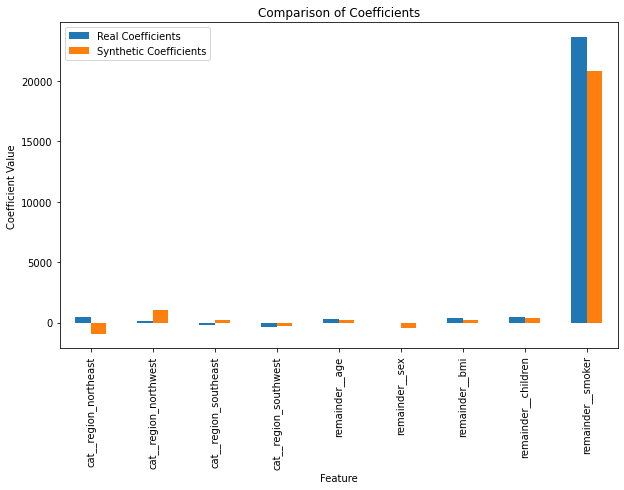

In [110]:
# Access the coefficients from the model within the pipeline
model_real = pipeline_real.named_steps['regressor']
model_synthetic = pipeline_synthetic.named_steps['regressor']

# Coefficients Comparison
coefficients_real = model_real.coef_
coefficients_synthetic = model_synthetic.coef_

print(X_real_train.shape, coefficients_real.shape, coefficients_synthetic.shape)

# Get feature names after transformation
feature_names = pipeline_real.named_steps['preprocessor'].get_feature_names_out()


coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Real Coefficients': coefficients_real,
    'Synthetic Coefficients': coefficients_synthetic
})

coefficients_df.plot(x='Feature', kind='bar', figsize=(10, 6))
plt.title('Comparison of Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

In [111]:
coefficients_real, coefficients_synthetic

(array([ 4.59585244e+02,  8.89079180e+01, -1.98279052e+02, -3.50214110e+02,
         2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
         2.36511289e+04]),
 array([ -919.64212535,  1035.07614877,   191.93408642,  -307.36810983,
          236.57922198,  -441.11657956,   241.20793314,   374.52731933,
        20802.40783337]))

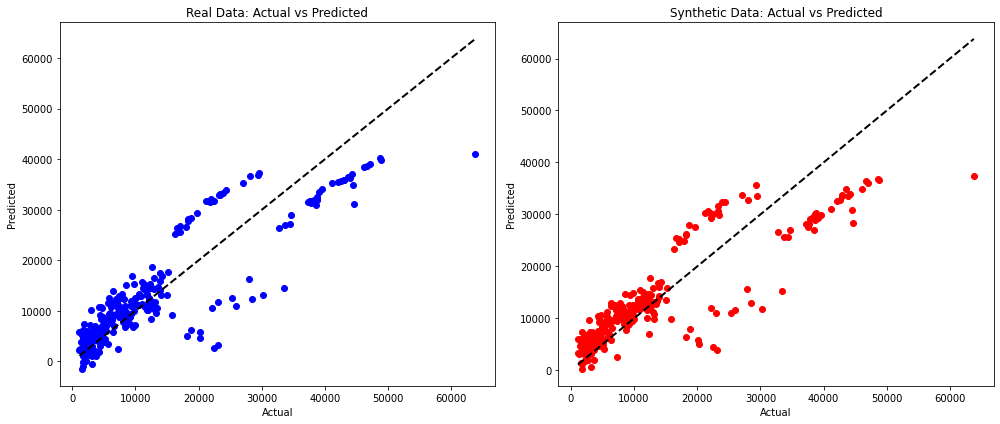

In [112]:
# Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_real_test, y_real_pred, color='blue')
plt.plot([y_real_test.min(), y_real_test.max()], [y_real_test.min(), y_real_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Real Data: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_real_test, y_synthetic_pred, color='red')
plt.plot([y_real_test.min(), y_real_test.max()], [y_real_test.min(), y_real_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Synthetic Data: Actual vs Predicted')

plt.tight_layout()
plt.show()

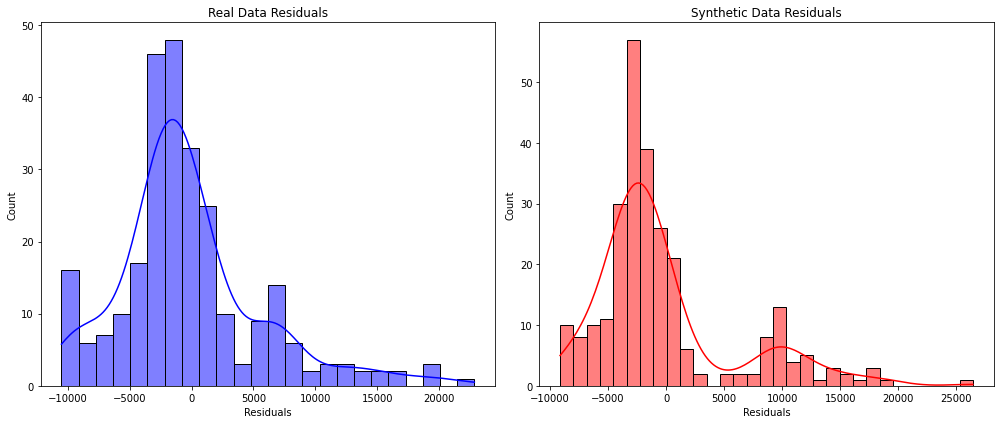

In [113]:
# Plot Residuals
residuals_real = y_real_test - y_real_pred
residuals_synthetic = y_real_test - y_synthetic_pred

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_real, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Real Data Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_synthetic, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Synthetic Data Residuals')

plt.tight_layout()
plt.show()

NameError: name 'X_real' is not defined